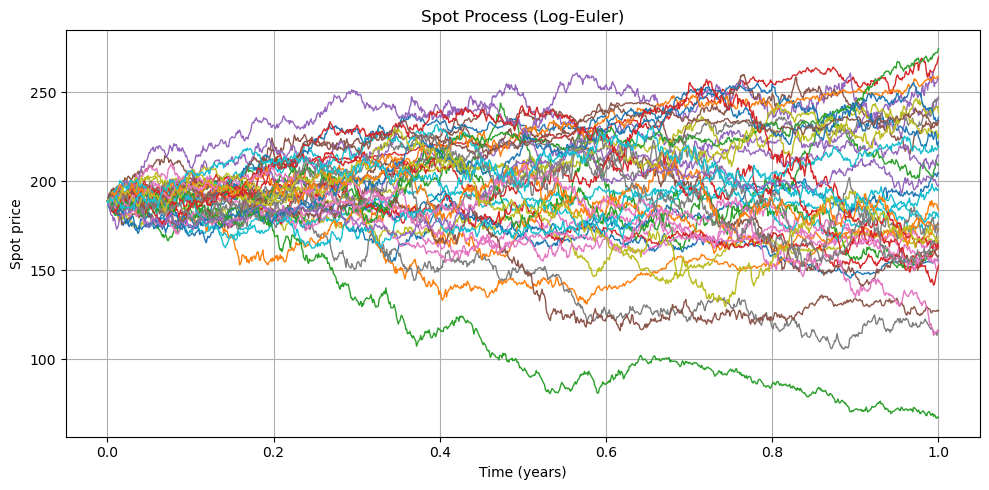

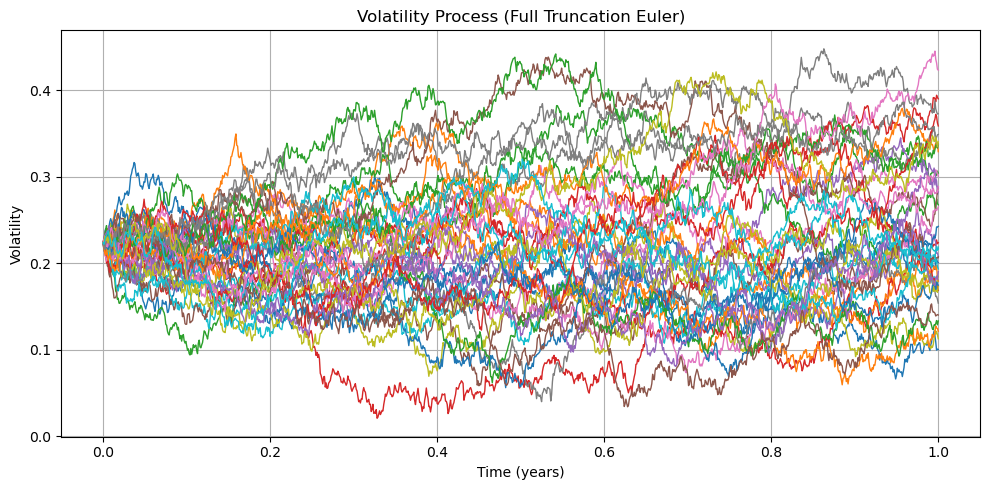

In [2]:
import numpy as np
import matplotlib.pyplot as plt

T = 1.0
n_steps = 1000
dt = T / n_steps
t = np.linspace(0.0, T, n_steps + 1)

n_paths = 40  # number of paths to visualize

S0 = 188.85
v0 = 0.05
r = 0.05
kappa = 2.0
theta = 0.05
sigma = 0.3
rho = -0.5

Z1 = np.random.randn(n_paths, n_steps)
Z2 = np.random.randn(n_paths, n_steps)

dW1 = np.sqrt(dt) * Z1
dW2 = np.sqrt(dt) * (rho * Z1 + np.sqrt(1.0 - rho**2) * Z2)

S = np.full((n_paths, n_steps + 1), S0)
v = np.full((n_paths, n_steps + 1), v0)

for i in range(n_steps):
    v_pos = np.maximum(v[:, i], 0.0)


    v[:, i + 1] = (
        v[:, i]
        + kappa * (theta - v_pos) * dt
        + sigma * np.sqrt(v_pos) * dW2[:, i]
    )

    S[:, i + 1] = S[:, i] * np.exp(
        (r - 0.5 * v_pos) * dt
        + np.sqrt(v_pos) * dW1[:, i]
    )

plt.figure(figsize=(10, 5))
for j in range(n_paths):
    plt.plot(t, S[j], linewidth=1)

plt.title("Spot Process (Log-Euler)")
plt.xlabel("Time (years)")
plt.ylabel("Spot price")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
for j in range(n_paths):
    plt.plot(t, np.sqrt(np.maximum(v[j], 0.0)), linewidth=1)

plt.title("Volatility Process (Full Truncation Euler)")
plt.xlabel("Time (years)")
plt.ylabel("Volatility")
plt.grid(True)
plt.tight_layout()
plt.show()